In [23]:
# import
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

In [24]:
# Data setup
data = """The Continuous Bag of Words is a natural language processing technique to generate word embeddings. Word embeddings are useful for many NLP tasks as they represent semantics and structural connections amongst words in a language."""
data

'The Continuous Bag of Words is a natural language processing technique to generate word embeddings. Word embeddings are useful for many NLP tasks as they represent semantics and structural connections amongst words in a language.'

In [25]:
sentences = data.split('.')
sentences

['The Continuous Bag of Words is a natural language processing technique to generate word embeddings',
 ' Word embeddings are useful for many NLP tasks as they represent semantics and structural connections amongst words in a language',
 '']

In [26]:
# Clean data
clean_sent = []
for sentence in sentences:
  if sentence=="":
    continue
  sentence = re.sub('[^A-Za-z0-9]+', ' ',(sentence))
  sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip() #strip() is important- no joke
  sentence = sentence.lower()
  clean_sent.append(sentence)

clean_sent

['the continuous bag of words is a natural language processing technique to generate word embeddings',
 'word embeddings are useful for many nlp tasks as they represent semantics and structural connections amongst words in a language']

In [27]:
# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[6, 7, 8, 9, 1, 10, 2, 11, 3, 12, 13, 14, 15, 4, 5], [4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 1, 30, 2, 3]]


In [28]:
word_to_index = {}
index_to_word = {}
for i,sequence in enumerate(sequences):
  word_in_sequence = clean_sent[i].split()

  for j, value in enumerate(sequence):
    index_to_word[value] = word_in_sequence[j]
    word_to_index[word_in_sequence[j]] = value

print(index_to_word,'\n')
print(word_to_index)


{6: 'the', 7: 'continuous', 8: 'bag', 9: 'of', 1: 'words', 10: 'is', 2: 'a', 11: 'natural', 3: 'language', 12: 'processing', 13: 'technique', 14: 'to', 15: 'generate', 4: 'word', 5: 'embeddings', 16: 'are', 17: 'useful', 18: 'for', 19: 'many', 20: 'nlp', 21: 'tasks', 22: 'as', 23: 'they', 24: 'represent', 25: 'semantics', 26: 'and', 27: 'structural', 28: 'connections', 29: 'amongst', 30: 'in'} 

{'the': 6, 'continuous': 7, 'bag': 8, 'of': 9, 'words': 1, 'is': 10, 'a': 2, 'natural': 11, 'language': 3, 'processing': 12, 'technique': 13, 'to': 14, 'generate': 15, 'word': 4, 'embeddings': 5, 'are': 16, 'useful': 17, 'for': 18, 'many': 19, 'nlp': 20, 'tasks': 21, 'as': 22, 'they': 23, 'represent': 24, 'semantics': 25, 'and': 26, 'structural': 27, 'connections': 28, 'amongst': 29, 'in': 30}


In [29]:
# Vocab
vocab_size = len(tokenizer.word_index)+1
emb_size = 10
context_size = 2

In [30]:
contexts=[]
targets=[]
for seq in sequences:
  for i in range(context_size, len(seq)-context_size):
    target = seq[i]
    context= [seq[i-2], seq[i-1], seq[i+1], seq[i+2]]

    contexts.append(context)
    targets.append(target)

In [31]:
for i in range(5):
  words=[]
  target = index_to_word.get(targets[i])
  for j in contexts[i]:
    words.append(index_to_word.get(j))
    print(words,'-> ', target)

['the'] ->  bag
['the', 'continuous'] ->  bag
['the', 'continuous', 'of'] ->  bag
['the', 'continuous', 'of', 'words'] ->  bag
['continuous'] ->  of
['continuous', 'bag'] ->  of
['continuous', 'bag', 'words'] ->  of
['continuous', 'bag', 'words', 'is'] ->  of
['bag'] ->  words
['bag', 'of'] ->  words
['bag', 'of', 'is'] ->  words
['bag', 'of', 'is', 'a'] ->  words
['of'] ->  is
['of', 'words'] ->  is
['of', 'words', 'a'] ->  is
['of', 'words', 'a', 'natural'] ->  is
['words'] ->  a
['words', 'is'] ->  a
['words', 'is', 'natural'] ->  a
['words', 'is', 'natural', 'language'] ->  a


In [32]:
# Divide into X and Y
X = np.array(contexts, dtype=np.int32)
Y = np.array(targets, dtype=np.int32)

In [33]:
#Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda (lambda x: tf.reduce_mean(x,axis=1)),
    Dense(256, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(vocab_size, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
history = model.fit(X,Y,epochs=80)

Epoch 1/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.1481 - loss: 3.3227
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1852 - loss: 3.3051
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1852 - loss: 3.2855
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.1852 - loss: 3.2637
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1852 - loss: 3.2395
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1852 - loss: 3.2129
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.1852 - loss: 3.1837
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.1852 - loss: 3.1517
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.1852 - loss: 3.1169
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.1852 - loss: 3.0791
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.1852 - loss: 3.0382
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.1852 - los

<Axes: >

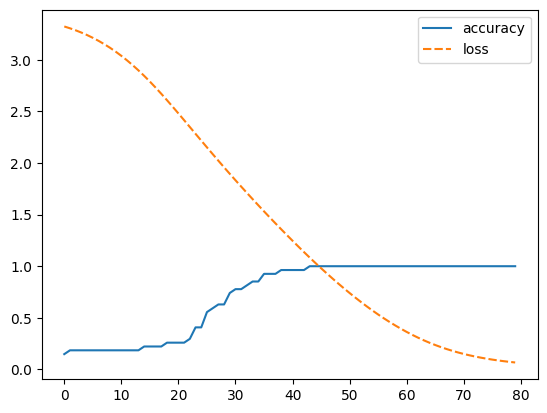

In [37]:
import seaborn as sns
sns.lineplot(model.history.history)

In [38]:
# PCA
from sklearn.decomposition import PCA
embeddings = model.get_weights()[0]
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [41]:
test_sentences = [
    "continuous bag words is",
    "natural language technique to",
    "technique to word embeddings"
]

In [42]:
for sent in test_sentences:
  test_words = sent.split(' ')

  x_test=[]
  for i in test_words:
    x_test.append(word_to_index.get(i))
  x_test=np.array([x_test])
  pred = model.predict(x_test)
  pred = np.argmax(pred[0])
  print("prediction: ", test_words, '\n=', index_to_word.get(pred),'\n\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
prediction:  ['continuous', 'bag', 'words', 'is'] 
= of 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
prediction:  ['natural', 'language', 'technique', 'to'] 
= processing 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
prediction:  ['technique', 'to', 'word', 'embeddings'] 
= generate 


